### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [2]:
df = pd.read_csv('waste.csv')

In [3]:
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1990,1990,kilotonnes,0.0,Fc,Calculated data
1,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1991,1991,kilotonnes,0.0,Fc,Calculated data
2,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1992,1992,kilotonnes,0.0,Fc,Calculated data
3,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1993,1993,kilotonnes,0.0,Fc,Calculated data
4,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1994,1994,kilotonnes,0.0,Fc,Calculated data


### EDA

#### Shape of Data

In [4]:
df.shape

(6238, 14)

In [5]:
rows, cols = df.shape
print("Number of Rows       = ", rows)
print("Number of Columns    = ", cols)


Number of Rows       =  6238
Number of Columns    =  14


#### Data Structure

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       6238 non-null   object 
 1   Domain            6238 non-null   object 
 2   Area Code (ISO3)  6238 non-null   object 
 3   Area              6238 non-null   object 
 4   Element Code      6238 non-null   int64  
 5   Element           6238 non-null   object 
 6   Item Code         6238 non-null   int64  
 7   Item              6238 non-null   object 
 8   Year Code         6238 non-null   int64  
 9   Year              6238 non-null   int64  
 10  Unit              6238 non-null   object 
 11  Value             6238 non-null   float64
 12  Flag              6238 non-null   object 
 13  Flag Description  6238 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 682.4+ KB


# **Select Useful Data**

In [7]:
df= df[["Area", "Year", "Value"]]

#### Finding missing values

In [8]:
df.isnull().sum()


Area     0
Year     0
Value    0
dtype: int64

#### Finding missing values in percentage

In [9]:
df.isnull().sum() / df.shape[0] * 100


Area     0.0
Year     0.0
Value    0.0
dtype: float64

#### Finding missing values with bar plot

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

<Figure size 3600x2400 with 0 Axes>

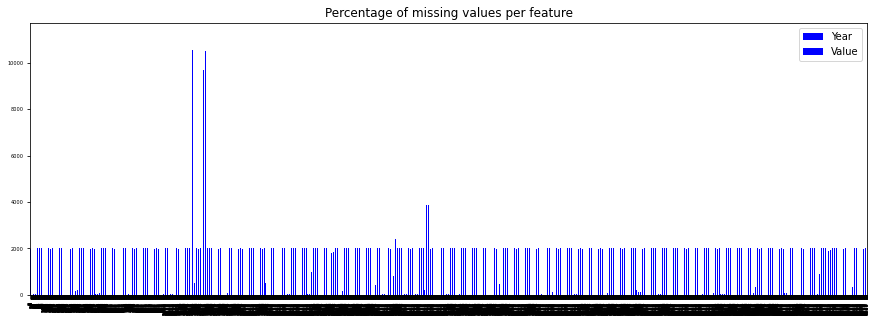

In [10]:
plt.figure(dpi=600)
df.plot(kind='bar', title='Percentage of missing values per feature', figsize=(15, 5),color='blue', fontsize=5)


#### Summary Statistics of data

In [11]:
df.describe()


,Year,Value
count,6238.000000,6238.000000
mean,2004.677300,202.675467
std,8.603289,1066.676986
min,1990.000000,0.000000
25%,1997.000000,0.000000
50%,2005.000000,0.652579
75%,2012.000000,30.517272
max,2019.000000,11151.696410


#### Value count

In [12]:
df['Value'].value_counts()


0.000000     2828
17.356301       1
17.343147       1
17.324444       1
17.311169       1
             ... 
47.010034       1
47.179100       1
47.292824       1
46.997779       1
35.841750       1
Name: Value, Length: 3411, dtype: int64

#### Hist plot

<AxesSubplot:xlabel='Value', ylabel='Count'>

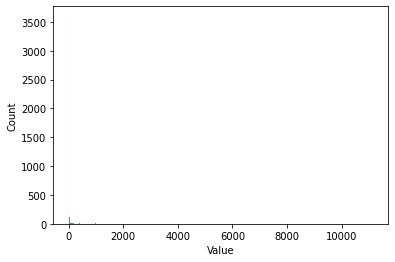

In [13]:
sns.histplot(df['Value'])


#### Dealing with duplicates

In [14]:
df.drop_duplicates(inplace=True)
print('Shape of Dataset after dropping the duplicates', df.shape)


Shape of Dataset after dropping the duplicates (6238, 3)


#### Skewness and kurtosis

In [15]:
df['Value'].agg(['skew', 'kurtosis']).transpose()


skew         8.415818
kurtosis    75.170198
Name: Value, dtype: float64

#### Boxplot to check outliers

c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

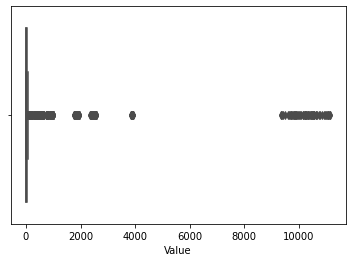

In [16]:
sns.boxplot(df['Value'], color="red")

#### To get more clear picture of data

In [17]:
df.nunique()

Area      217
Year       30
Value    3411
dtype: int64

#### Structure

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6238 entries, 0 to 6237
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    6238 non-null   object 
 1   Year    6238 non-null   int64  
 2   Value   6238 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 194.9+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'China, mainland'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'United States of America'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'France'),
  Text(7, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(8, 0, 'Republic of Korea'),
  Text(9, 0, 'India'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'China, Hong Kong SAR'),
  Text(13, 0, 'Dominican Republic'),
  Text(14, 0, 'Malaysia'),
  Text(15, 0, 'Haiti'),
  Text(16, 0, 'Cuba'),
  Text(17, 0, 'Philippines'),
  Text(18, 0, 'Viet Nam'),
  Text(19, 0, 'Switzerland'),
  Text(20, 0, 'Spain'),
  Text(21, 0, 'Jamaica'),
  Text(22, 0, 'Poland'),
  Text(23, 0, 'Austria'),
  Text(24, 0, 'Greece'),
  Text(25, 0, 'Australia'),
  Text(26, 0, 'Mongolia'),
  Text(27, 0, 'Portugal'),
  Text(28, 0, 'Sweden'),
  Text(29, 0,

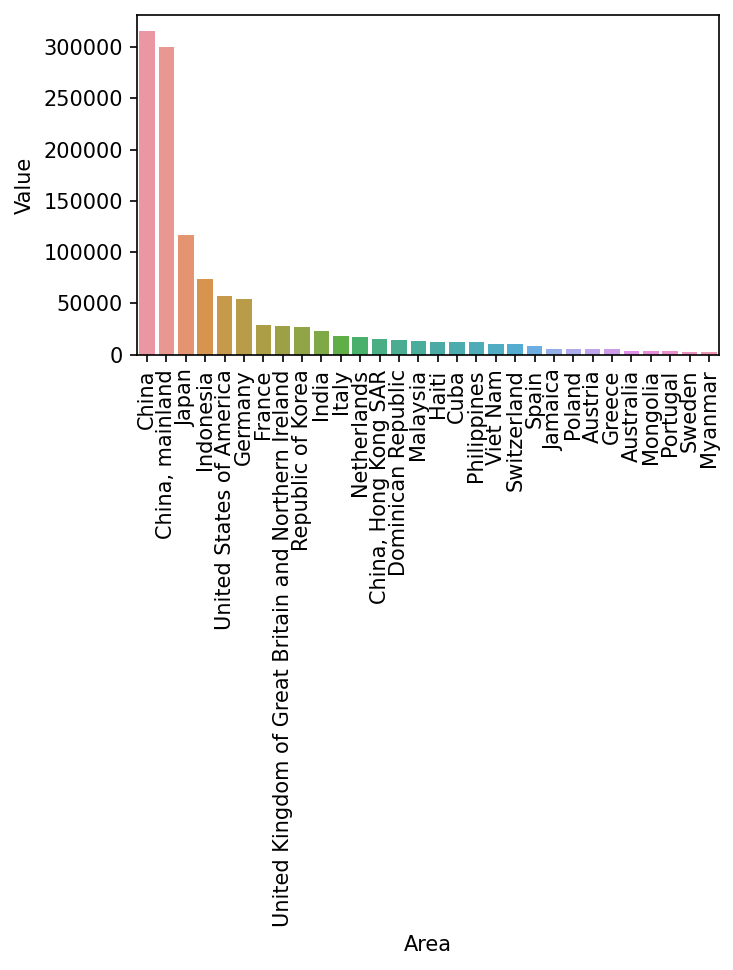

In [19]:
a = df.groupby(["Area"]).sum().sort_values(
    by=["Value"], ascending=False).head(30)
a

plt.figure(figsize=(5, 3), dpi=150, linewidth=2)
sns.barplot(x=a.index, y='Value', data=a)
plt.xticks(rotation=90)


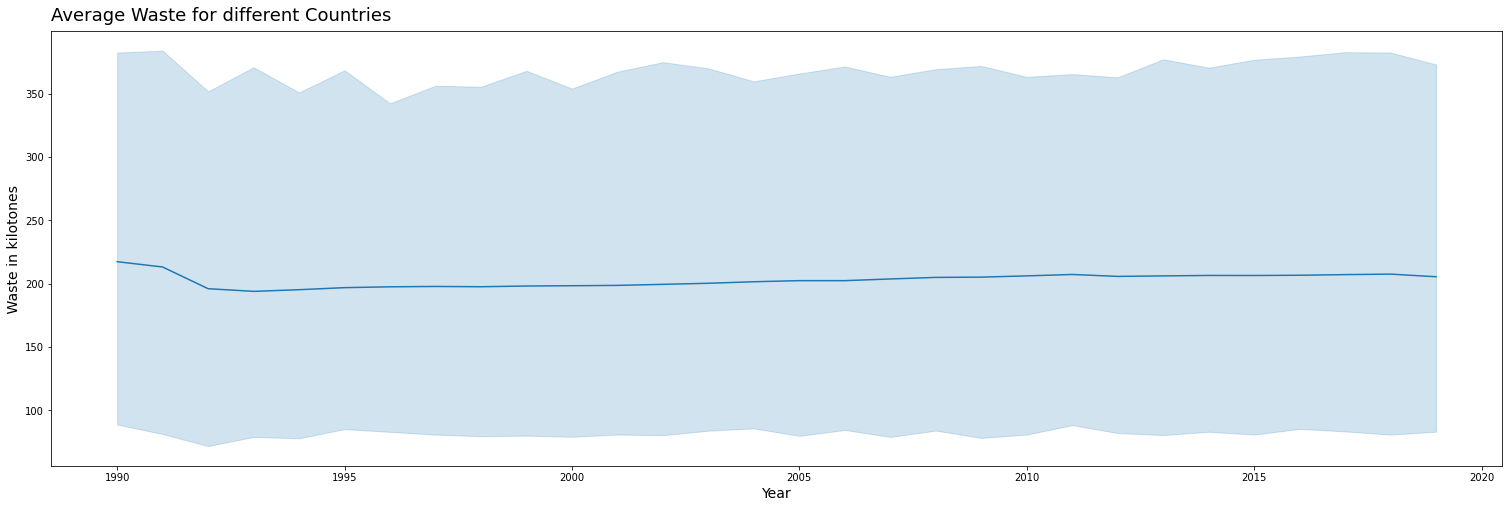

In [20]:
plt.figure(figsize=(26, 8))
sns.lineplot(x="Year", y="Value", data=df)

#customisation
#plt.ylim(10,)
#sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Average Waste for different Countries",
          fontsize=18, loc='left', y=1.01)
plt.xlabel("Year", fontsize=14)
plt.ylabel(" Waste in kilotones ", fontsize=14)

plt.show()


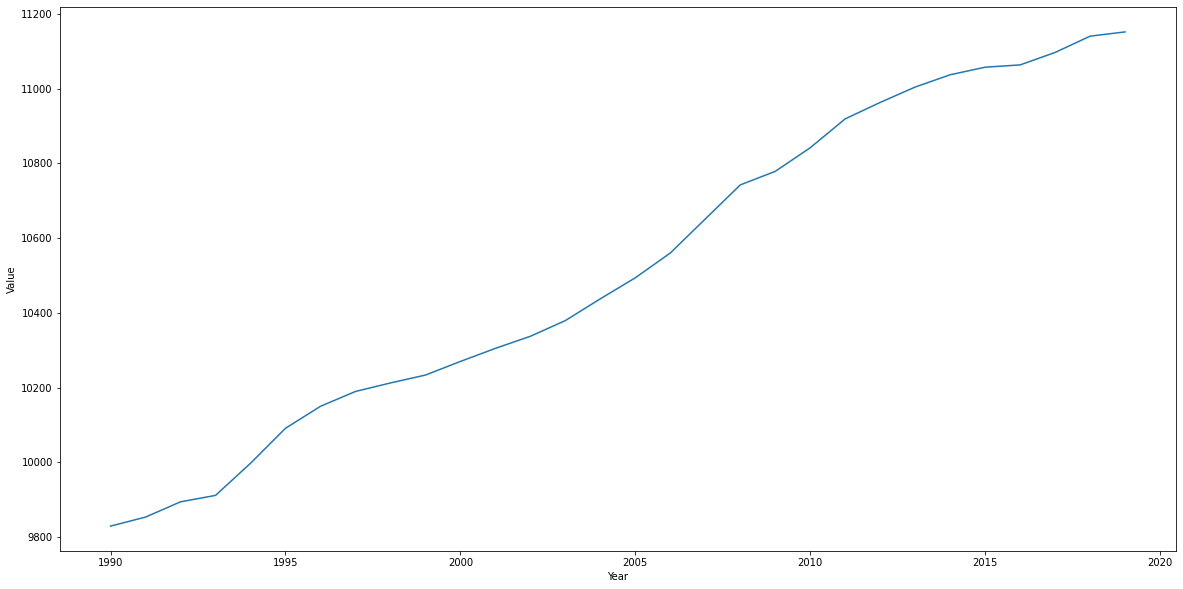

In [21]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df[df["Area"]=="China"])
plt.show()

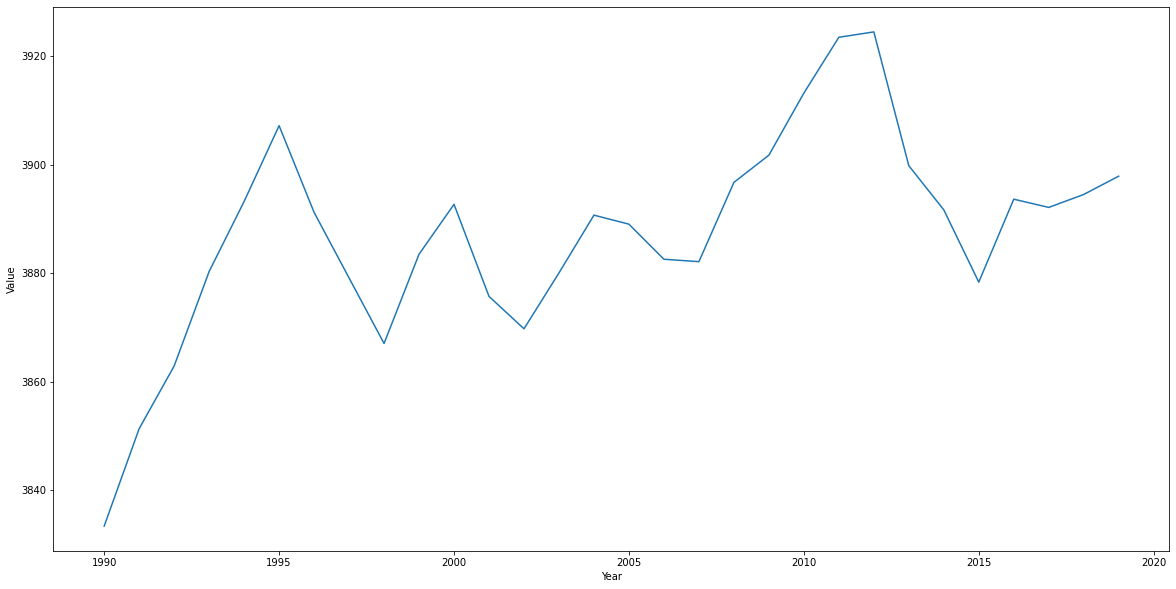

In [22]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Value", data=df[df["Area"] == "Japan"])
plt.show()


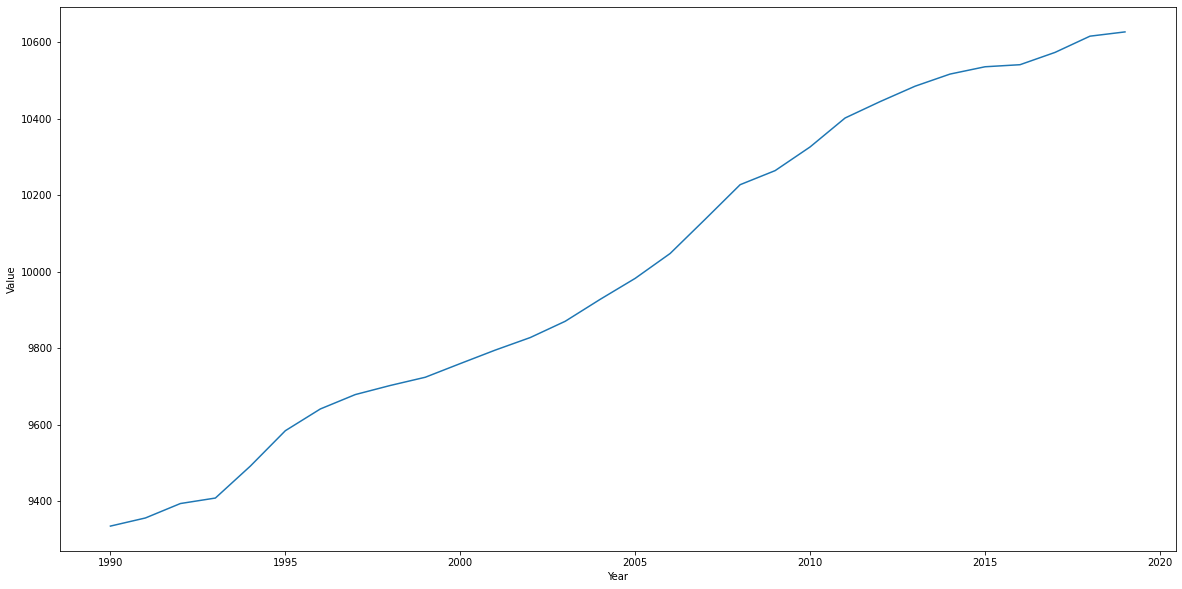

In [23]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Value", data=df[df["Area"] == "China, mainland"])
plt.show()


#### Label Encdoing

In [24]:
# there are some columns which are not in use but to get a really clear picture lets use those as well
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Area'] = label.fit_transform(df['Area'])



c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Percentage of nans per feature column')

<Figure size 720x360 with 0 Axes>

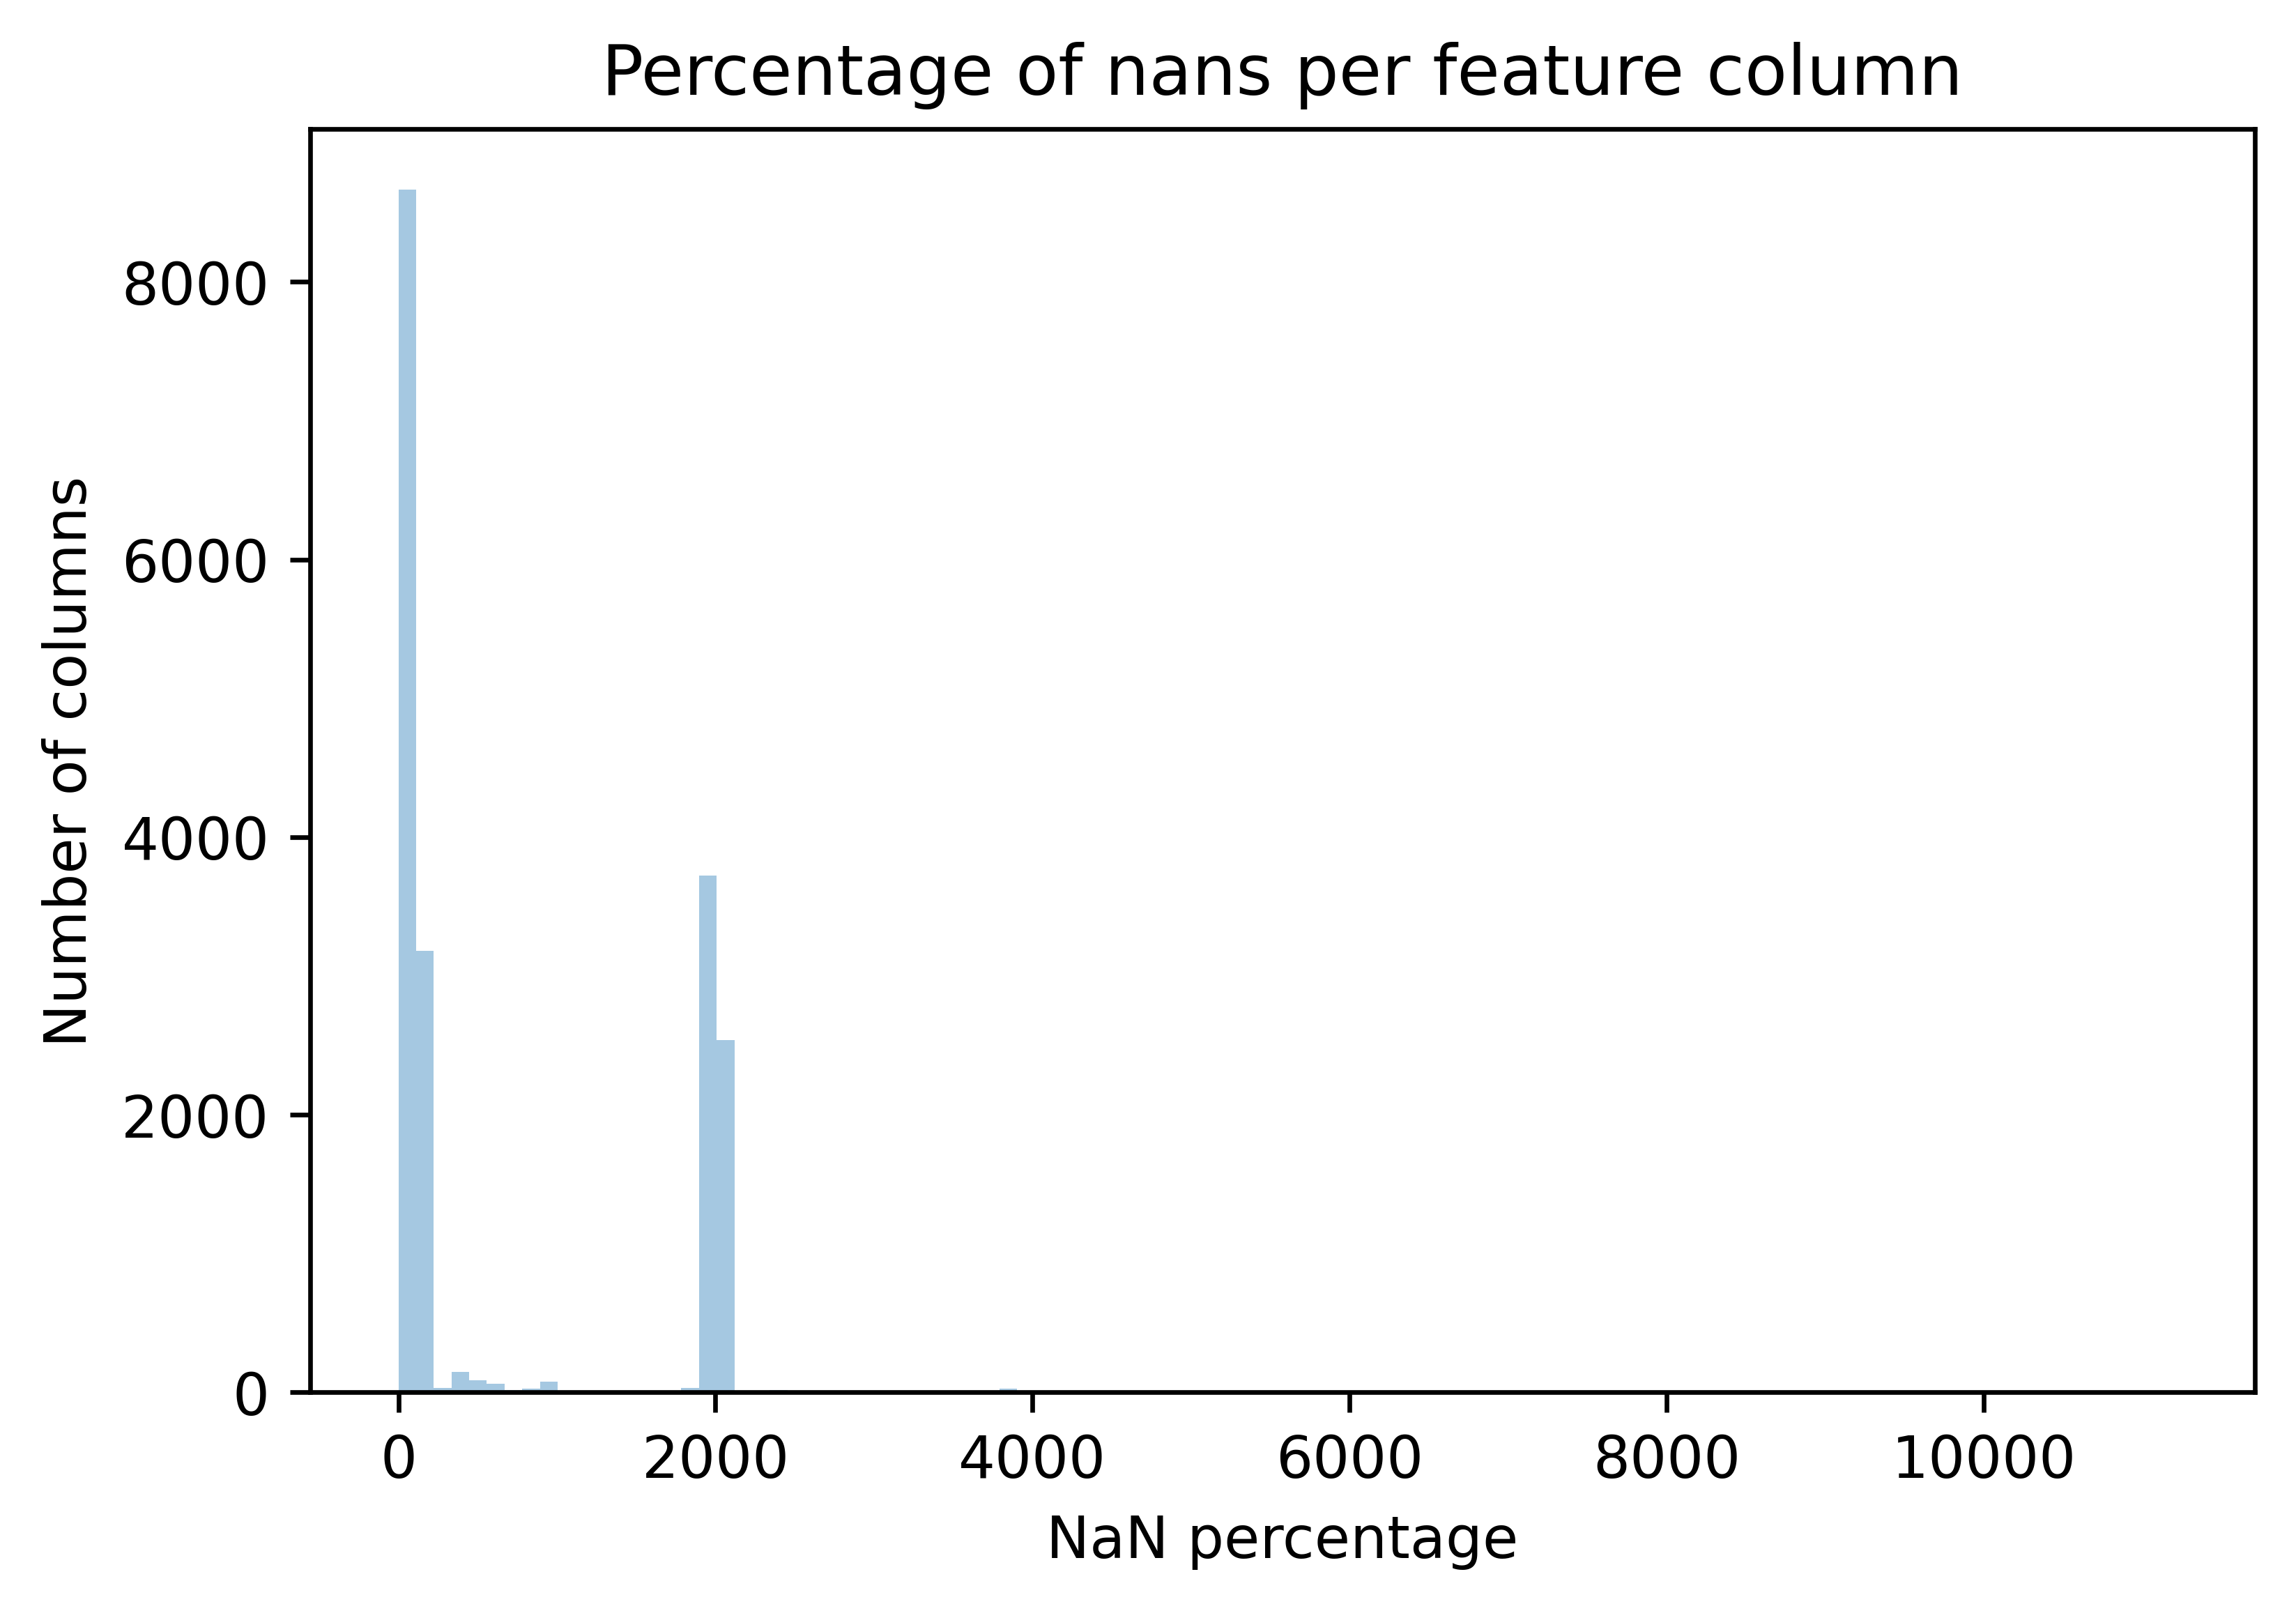

In [25]:
plt.figure(figsize=(10, 5))
plt.figure(dpi=600)
sns.distplot(df, bins=100, kde=False)
plt.xlabel("NaN percentage")
plt.ylabel("Number of columns")
plt.title("Percentage of nans per feature column")

In [26]:
df.head()

,Area,Year,Value
0,0,1990,0.0
1,0,1991,0.0
2,0,1992,0.0
3,0,1993,0.0
4,0,1994,0.0


In [27]:
df.describe()

,Area,Year,Value
count,6238.000000,6238.000000,6238.000000
mean,106.821097,2004.677300,202.675467
std,62.111647,8.603289,1066.676986
min,0.000000,1990.000000,0.000000
25%,54.000000,1997.000000,0.000000
50%,106.000000,2005.000000,0.652579
75%,159.750000,2012.000000,30.517272
max,216.000000,2019.000000,11151.696410


In [28]:
corr = df.corr(method="pearson")
corr


,Area,Year,Value
Area,1.000000,0.005667,-0.080933
Year,0.005667,1.000000,0.002170
Value,-0.080933,0.002170,1.000000


<AxesSubplot:>

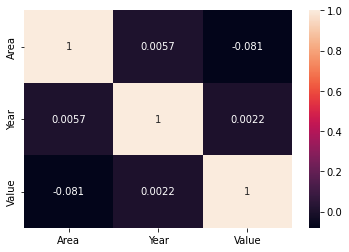

In [29]:
sns.heatmap(corr, annot=True)


#### Checking the Normality of Data

c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

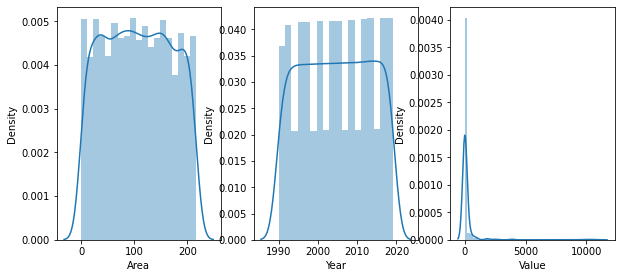

In [30]:
c = 1
plt.figure(figsize=(10, 30))
for i in df:
    plt.subplot(6, 3, c)
    sns.distplot(df[i])
    c = c+1
plt.show()


c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


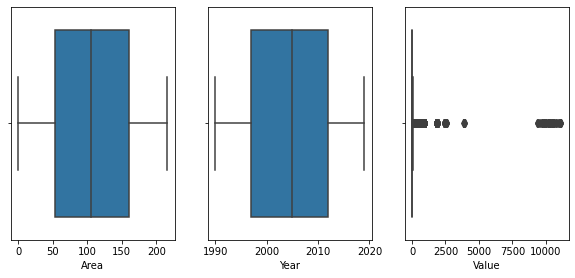

In [31]:
c = 1
plt.figure(figsize=(10, 30))
for i in df:
    plt.subplot(6, 3, c)
    sns.boxplot(df[i])
    c = c+1
plt.show()


#### To remove outliers

In [32]:
# there are some outliers so we are going to taking those off from data set
def mod_outlier(df):
    col_vals = df.columns
    df1 = df.copy()
    df = df._get_numeric_data()

    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for col in col_vals:
        for i in range(0, len(df[col])):
            if df[col][i] < lower_bound[col]:
                df[col][i] = lower_bound[col]

            if df[col][i] > upper_bound[col]:
                df[col][i] = upper_bound[col]

    for col in col_vals:
        df1[col] = df[col]

        return(df1)


In [33]:
mod_outlier(df)


C:\Users\Dell\AppData\Local\Temp\ipykernel_8672\2670721790.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]


,Area,Year,Value
0,0,1990,0.0
1,0,1991,0.0
2,0,1992,0.0
3,0,1993,0.0
4,0,1994,0.0
...,...,...,...
6233,216,2015,0.0
6234,216,2016,0.0
6235,216,2017,0.0
6236,216,2018,0.0


#### Checking if outliers are gone or not

c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


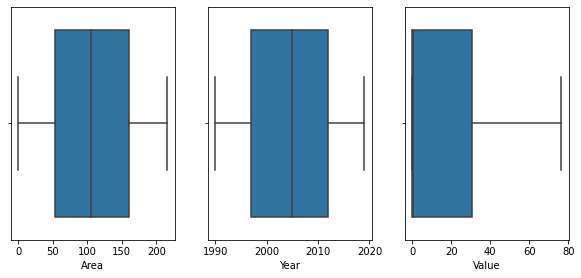

In [34]:
c = 1
plt.figure(figsize=(10, 30))
for i in df:
    plt.subplot(6, 3, c)
    sns.boxplot(df[i])
    c = c+1
plt.show()


In [35]:
df.head()

,Area,Year,Value
0,0,1990,0.0
1,0,1991,0.0
2,0,1992,0.0
3,0,1993,0.0
4,0,1994,0.0


In [36]:
df.nunique()

Area      217
Year       30
Value    2376
dtype: int64

####  DATA VISUALIZATION

c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

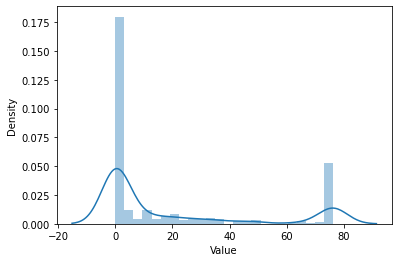

In [37]:
sns.distplot(df["Value"])

c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

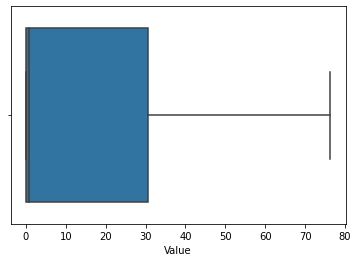

In [38]:
sns.boxplot(df["Value"])

c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

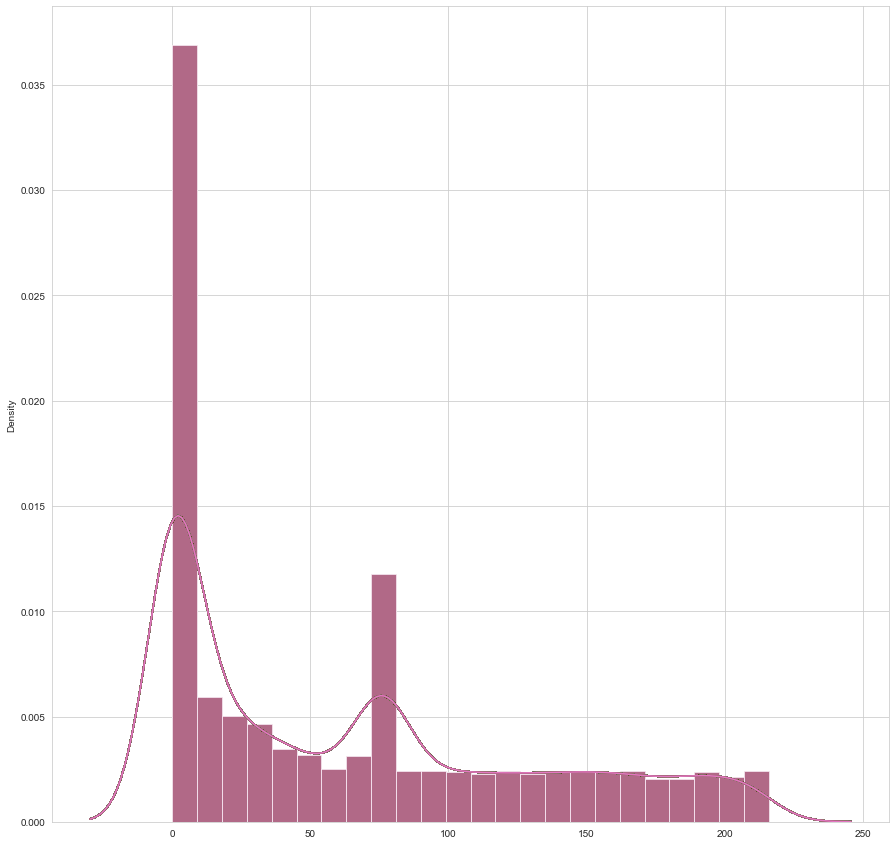

In [39]:
countries = df['Area'].unique()
sns.set_style("whitegrid")
plt.figure(figsize=(15, 15))

for country in countries:
    sns.distplot(df[["Area","Value"]])


c:\Users\Dell\miniconda3\envs\pandas_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

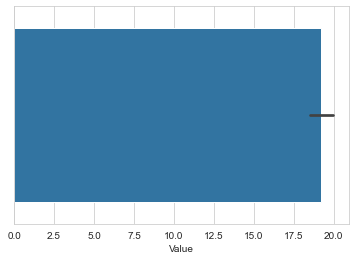

In [46]:
sns.barplot(df["Value"])

In [42]:
# there are some columns which are not in use but to get a really clear picture lets use those as well
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Area'] = label.fit_transform(df['Area'])

In [47]:
a=df.groupby(["Year"]).sum().sort_values(by="Value", ascending=False).head(30)
a

,Area,Value
Year,,
2014,22778,4181.583750
2017,22778,4180.774814
2013,22778,4180.382573
2012,22778,4176.987560
2011,22413,4176.498807
2016,22778,4176.341295
2015,22778,4175.784367
2008,22413,4171.175828
2010,22413,4169.679111


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017'),
  Text(28, 0, '2018'),
  Text(29, 0, '2019')])

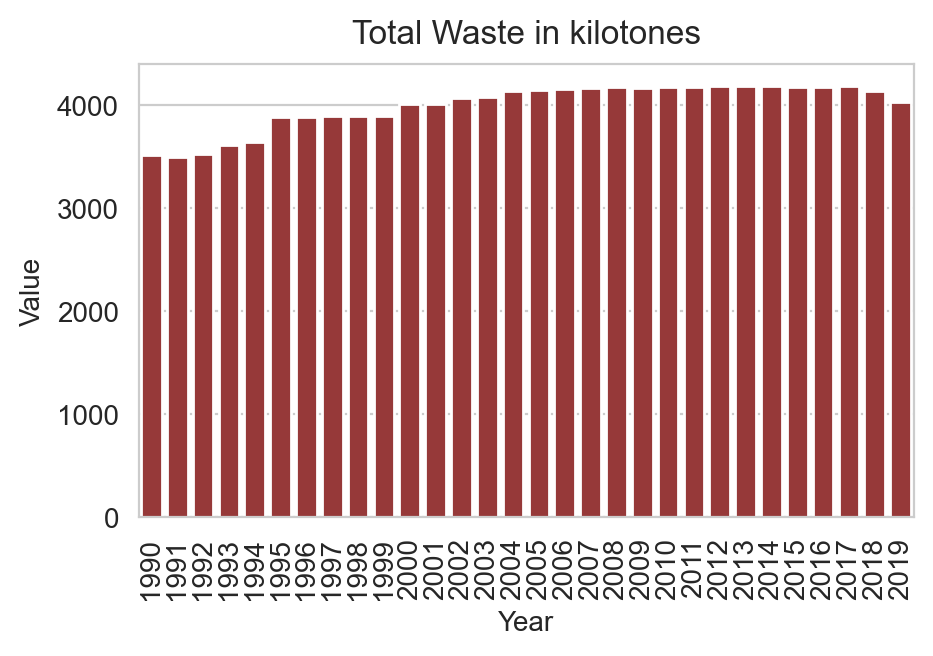

In [48]:
plt.figure(figsize=(5,3), dpi=200, linewidth=2)
sns.barplot(x=a.index,y='Value',data=a, color = 'brown')
plt.title("Total Waste in kilotones", fontsize = 12, loc='center', y=1.01 )
plt.xticks(rotation=90)

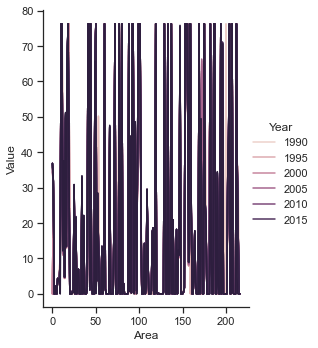

In [49]:
sns.set_theme(style="ticks")

palette = sns.color_palette("rocket_r")

sns.relplot(
    data=df,
    x="Area", y="Value",
    hue="Year",
    kind="line", size_order=["T1", "T2"],
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)


<AxesSubplot:xlabel='Value', ylabel='Area'>

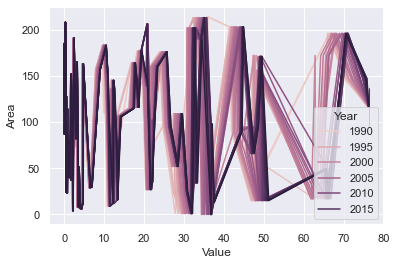

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="Value", y="Area",
             hue="Year",
             data=df)


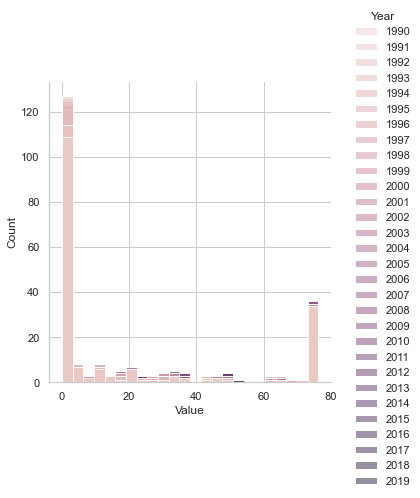

In [ ]:
sns.set_theme(style="whitegrid")
sns.displot(
    data=df,
    x="Value", hue="Year"    
)



<AxesSubplot:>

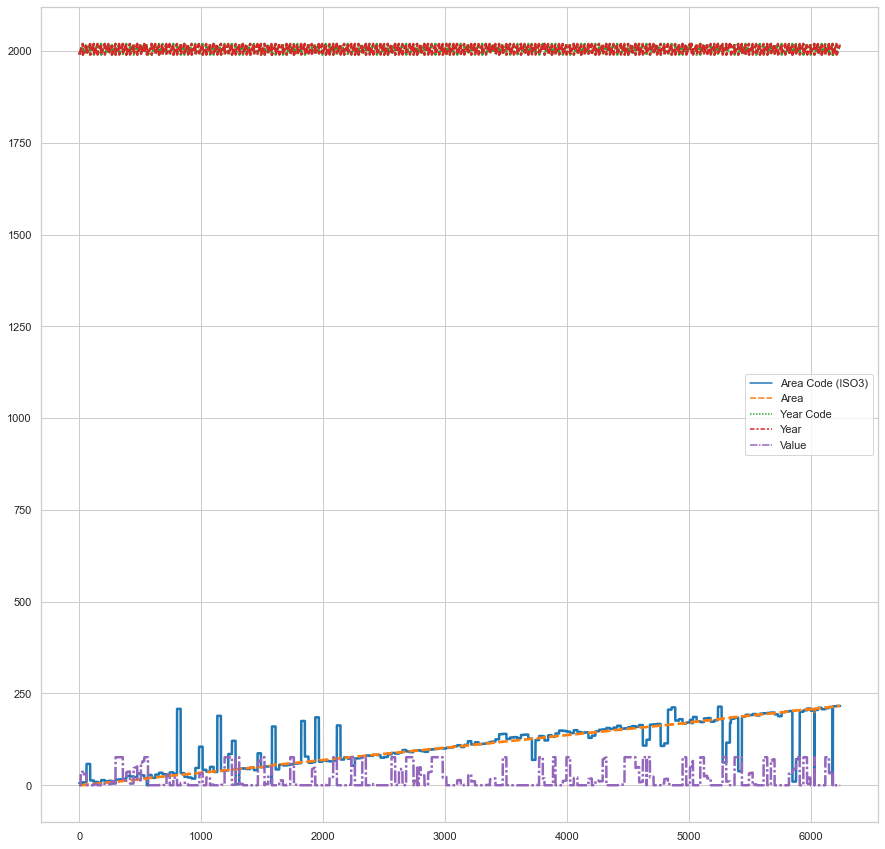

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 15))
sns.lineplot(data=df, palette="tab10", linewidth=2.5)


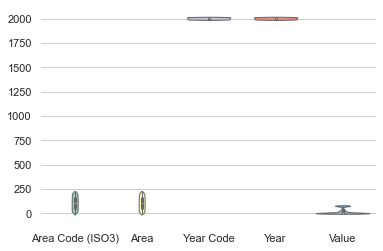

In [ ]:
sns.set_theme(style="whitegrid")


sns.violinplot(data=df, palette="Set3", bw=.2, cut=1, linewidth=1)
sns.despine(left=True, bottom=True)


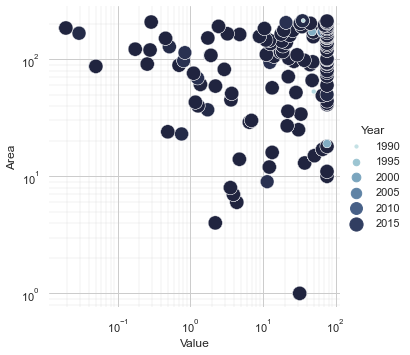

In [ ]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="Value", y="Area",
    hue="Year", size="Year",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)


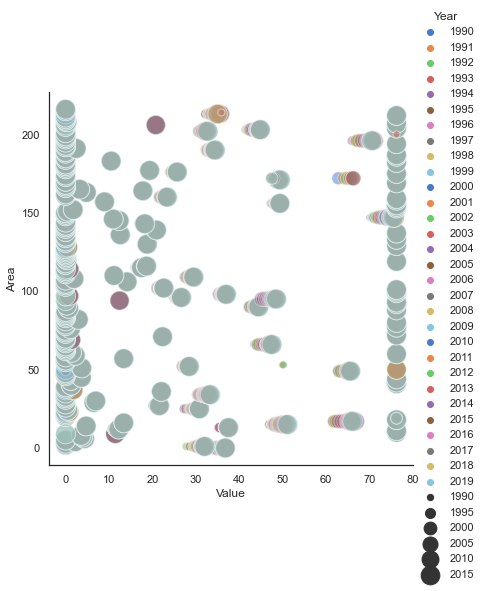

In [ ]:
sns.set_theme(style="white")

sns.relplot(x="Value", y="Area", hue="Year", size="Year",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)


<AxesSubplot:xlabel='Value', ylabel='Area'>

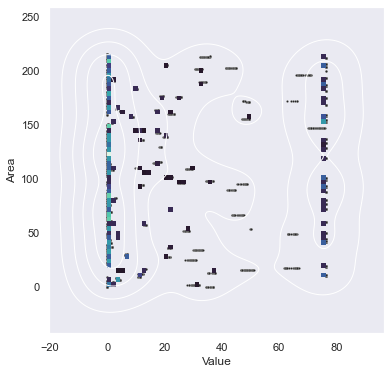

In [ ]:
sns.set_theme(style="dark")


f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='Value', y='Area', s=5, color=".15",data=df)
sns.histplot(x='Value', y='Area', bins=50, pthresh=.1, cmap="mako",data=df)
sns.kdeplot(x='Value', y='Area', levels=5, color="w", linewidths=1, data=df)


In [ ]:
s=df.groupby(["Year"]).sum().sort_values(by="Value", ascending=False).head(30)
s

,Area Code (ISO3),Area,Year Code,Value
Year,,,,
2014,23260,22778,426968,4181.583750
2017,23260,22778,427604,4180.774814
2013,23260,22778,426756,4180.382573
2012,23260,22778,426544,4176.987560
2011,22911,22413,422310,4176.498807
2016,23260,22778,427392,4176.341295
2015,23260,22778,427180,4175.784367
2008,22911,22413,421680,4171.175828
2010,22911,22413,422100,4169.679111


In [ ]:
a = df.groupby(["Year", "Value"]).sum().sort_values(
    by="Area").head(30)
a


,,Area Code (ISO3),Area,Year Code
Year,Value,,,
2013,36.904663,6,0,2013
2018,36.821074,6,0,2018
2007,35.744762,6,0,2007
2011,36.680935,6,0,2011
2008,35.801329,6,0,2008
2014,36.898894,6,0,2014
2002,34.381732,6,0,2002
2006,35.223750,6,0,2006
2019,36.790219,6,0,2019


In [65]:
c = df.groupby(["Year", "Area"]).sum().sort_values(
    by="Value", ascending=False).head(30).nlargest(30,'Value')
c


Area Code (ISO3)  Year Code      Value
Year Area                                        
2010 158                108       2010  76.293181
2013 207                204       2013  76.293181
2003 11                  16       2003  76.293181
     10                  15       2003  76.293181
2017 60                  57       2017  76.293181
2014 10                  15       2014  76.293181
1995 194                196       1995  76.293181
     158                108       1995  76.293181
     155                161       1995  76.293181
     154                158       1995  76.293181
     153                155       1995  76.293181
2003 77                  53       2003  76.293181
     72                  67       2003  76.293181
1995 119                140       1995  76.293181
2017 93                  90       2017  76.293181
     92                  92       2017  76.293181
     88                  88       2017  76.293181
2013 204                 71       2013  76.293181
1995 129                134       1995  76.293181
2013 194                196       2013  76.293181
2003 60                  57       2003  76.293181
1995 137                146       1995  76.293181
2003 50                  49       2003  76.293181
2017 80                  79       2017  76.293181
2013 212                210       2013  76.293181
2003 44                   3       2003  76.293181
     42                  85       2003  76.293181
     41                  40       2003  76.293181
2017 77                  53       2017  76.293181
1995 187                 38       1995  76.293181

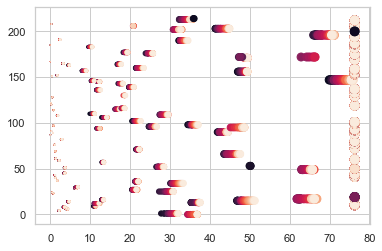

In [72]:
plt.scatter('Value', 'Area', c='Year',s='Value', data=df)
plt.show()


In [80]:
s = df.groupby(["Year"]).sum().sort_values(
    by="Value", ascending=False).head(30)
s


,Area,Value
Year,,
2014,22778,4181.583750
2017,22778,4180.774814
2013,22778,4180.382573
2012,22778,4176.987560
2011,22413,4176.498807
2016,22778,4176.341295
2015,22778,4175.784367
2008,22413,4171.175828
2010,22413,4169.679111


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017'),
  Text(28, 0, '2018'),
  Text(29, 0, '2019')])

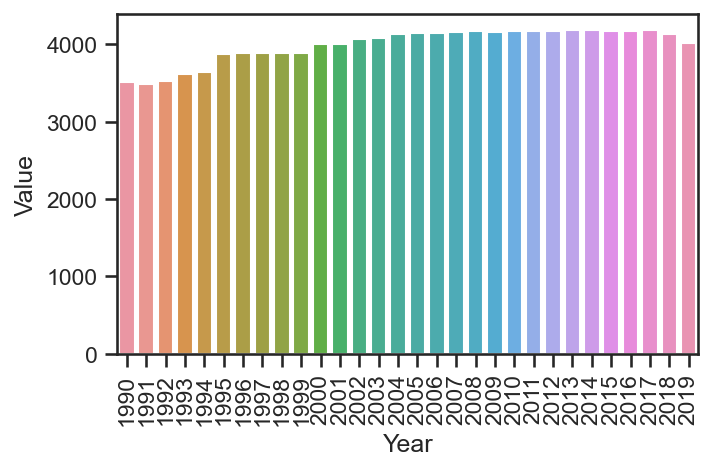

In [82]:
plt.figure(figsize=(5, 3), dpi=150, linewidth=2)
sns.barplot(x=s.index, y='Value', data=s)
plt.xticks(rotation=90)


In [83]:
a = df.groupby(["Area"]).sum().sort_values(
    by="Value", ascending=False).head(30)
a


,Year,Value
Area,,
101,60135,2288.795419
204,60135,2288.795419
119,60135,2288.795419
129,60135,2288.795419
80,60135,2288.795419
158,60135,2288.795419
187,60135,2288.795419
186,60135,2288.795419
182,60135,2288.795419


In [85]:
a = df.groupby(["Area"]).sum().sort_values(
    by="Value", ascending=False).head(30)
a

plt.figure(figsize=(5, 3), dpi=150, linewidth=2)
sns.Barlow(x=a.index, y='Value', data=a)
plt.xticks(rotation=90)


AttributeError: module 'seaborn' has no attribute 'Barlow'

<Figure size 750x450 with 0 Axes>

#### For subcontinent

In [55]:
df_sub = df[df["Area"].isin(["India", "Pakistan", 'Bangladesh'])]
df_sub.head()


,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
446,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1990,1990,kilotonnes,46.863842,Fc,Calculated data
447,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1991,1991,kilotonnes,46.824124,Fc,Calculated data
448,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1992,1992,kilotonnes,46.870611,Fc,Calculated data
449,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1993,1993,kilotonnes,46.957732,Fc,Calculated data
450,GW,Waste Disposal,BGD,Bangladesh,7273,Emissions (CO2),6990,Incineration,1994,1994,kilotonnes,46.992608,Fc,Calculated data


<AxesSubplot:xlabel='Year'>

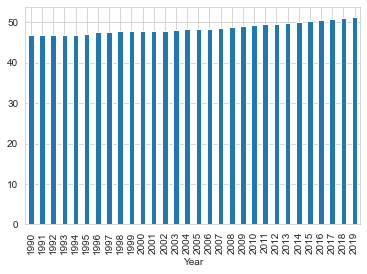

In [57]:
df_sub[df_sub["Area"]=="Bangladesh"].groupby("Year")["Value"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Year'>

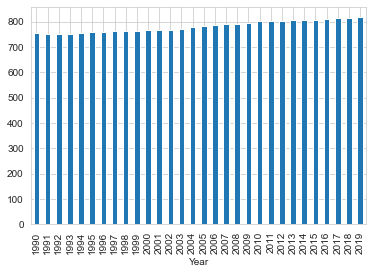

In [58]:
df_sub[df_sub["Area"]=="India"].groupby("Year")["Value"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Year'>

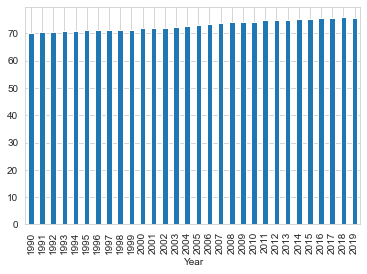

In [59]:
df_sub[df_sub["Area"]=="Pakistan"].groupby("Year")["Value"].mean().plot(kind="bar")

<AxesSubplot:ylabel='Area'>

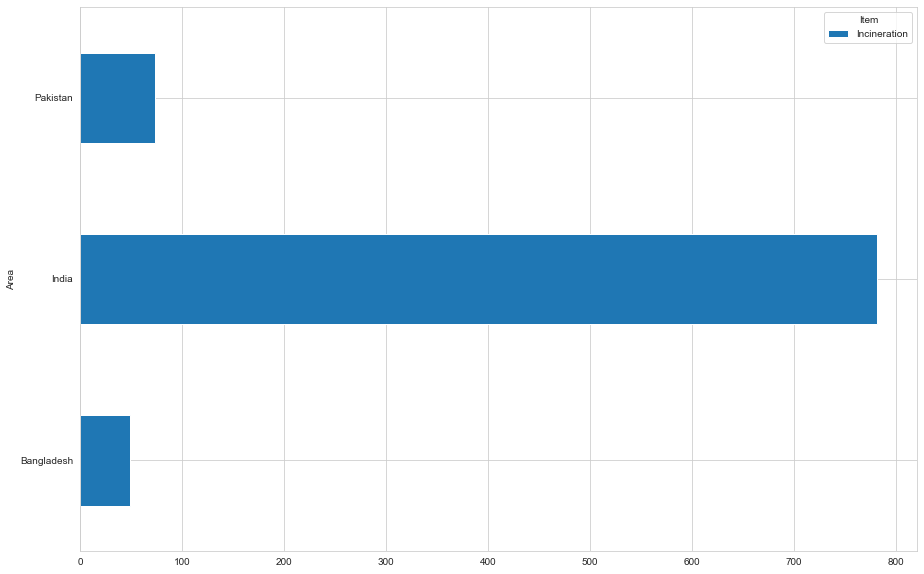

In [62]:
df_sub.groupby(['Area', 'Item'])['Value'].mean(
).unstack().plot(kind='barh', figsize=(15, 10))


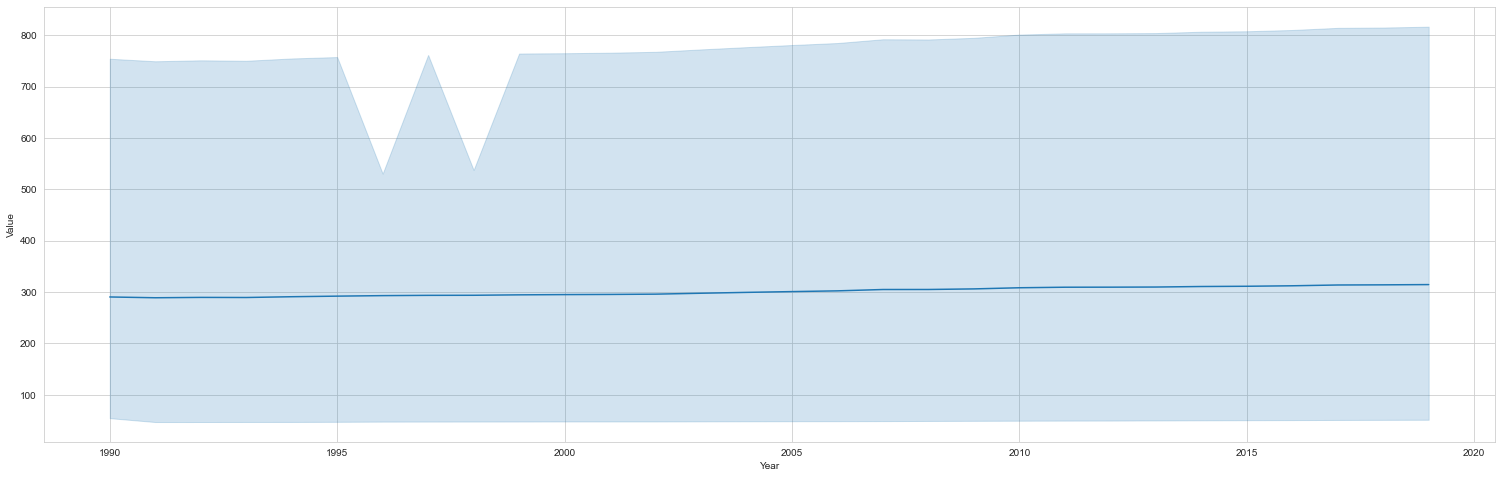

In [63]:
plt.figure(figsize=(26, 8))
sns.lineplot(x="Year", y="Value", data=df_sub)

#customisation
#plt.ylim(10,)
#sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()


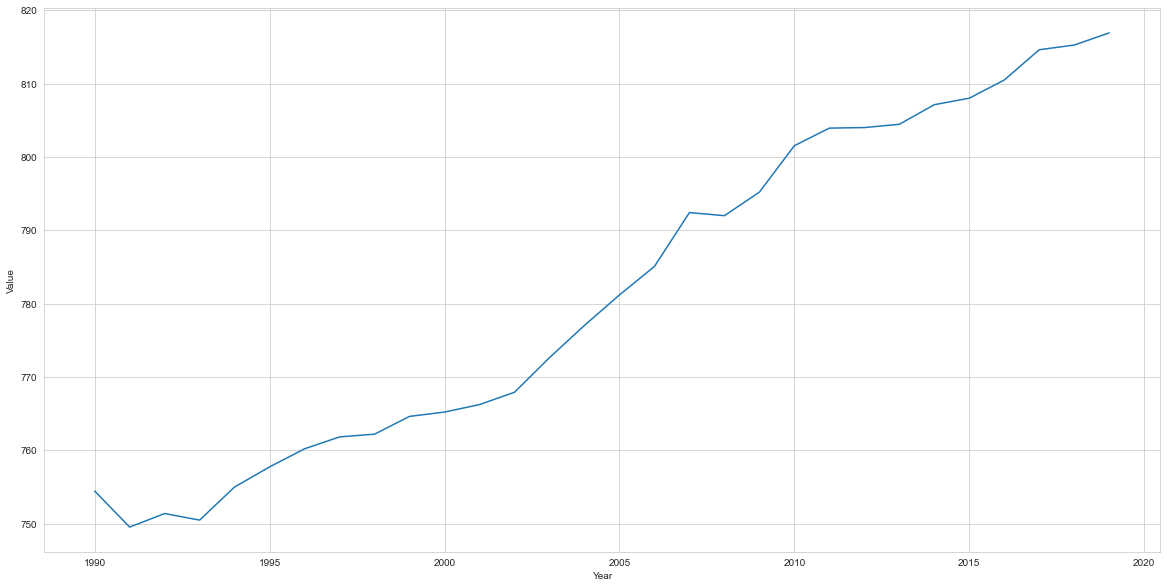

In [64]:
# Contruct visualisation for india's energy usage increase over the years
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Value", data=df_sub[df_sub["Area"] == "India"])
plt.show()
